In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import ipywidgets
from ipywidgets import interact, interactive, Dropdown, widgets
from IPython.display import clear_output, display, HTML

In [3]:
import os
import pickle
import pprint
from glob import glob
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from h5py import File

from utils.plotting import plot_psg_hypnogram_hypnodensity
from utils.plotting import plot_hypnodensity

In [5]:
available_predictions = glob("experiments/**/SSC-WSC_test_predictions.pkl", recursive=True)
pprint.pprint(available_predictions)

['experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl']


In [12]:
selected_experiment = available_predictions[1]
with open(selected_experiment, 'rb') as f:
    predictions = pickle.load(f)
list_studies = list(predictions.keys())
df = pd.read_csv('overview_file_cohortsEM-ling1.csv')
df_preds = pd.read_csv(os.path.join(os.path.dirname(selected_experiment), 'SSC-WSC_test_results.csv'), index_col=0)
df_preds = pd.merge(left=df_preds, right=df[['ID', 'Diagnosis', 'Label']], how='left', right_on='ID', left_on='SubjectID')
display(df_preds.query('Label == 0').sort_values('Accuracy', ascending=True))

,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,ID,Diagnosis,Label
396,SSC_5280_1.h5,SSC_5280_1,1 s,all,0.474593,0.530022,0.314027,0.395287,0.529237,0.530022,...,0.940476,0.763285,207.0,0.145631,0.078534,1.000000,15.0,SSC_5280_1,'NON-NARCOLEPSY CONTROL',0
464,SSC_6094_1.h5,SSC_6094_1,1 s,all,0.477019,0.656685,0.354277,0.472045,0.504350,0.656685,...,0.212121,1.000000,35.0,0.747059,0.628713,0.920290,138.0,SSC_6094_1,'NON-NARCOLEPSY CONTROL',0
544,SSC_7444_1.h5,SSC_7444_1,1 s,all,0.488608,0.485583,0.329580,0.400007,0.485003,0.485583,...,0.093750,0.136364,22.0,0.690058,0.536364,0.967213,61.0,SSC_7444_1,'NON-NARCOLEPSY CONTROL',0
452,SSC_6036_1.h5,SSC_6036_1,1 s,all,0.509202,0.560395,0.319537,0.469242,0.610577,0.560395,...,1.000000,0.107759,232.0,0.868347,0.939394,0.807292,192.0,SSC_6036_1,'NON-NARCOLEPSY CONTROL',0
536,SSC_7339_1.h5,SSC_7339_1,1 s,all,0.516190,0.581604,0.332846,0.420513,0.480492,0.465283,...,0.000000,0.000000,0.0,0.735178,0.885714,0.628378,148.0,SSC_7339_1,'NON-NARCOLEPSY CONTROL',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,A0147_6 165655.h5,A0147_6 165655,1 s,all,0.900966,0.871082,0.842300,0.800551,0.769639,0.871082,...,0.597015,0.851064,47.0,0.938462,0.945736,0.931298,131.0,A0147_6 165655,'NON-NARCOLEPSY CONTROL',0
93,A2202_3 171828.h5,A2202_3 171828,1 s,all,0.908976,0.836763,0.793684,0.777232,0.766219,0.836763,...,0.705128,1.000000,55.0,0.805970,0.692308,0.964286,28.0,A2202_3 171828,'NON-NARCOLEPSY CONTROL',0
176,C1584_3 172654.h5,C1584_3 172654,1 s,all,0.912027,0.815213,0.865526,0.784308,0.761220,0.815213,...,0.485714,0.586207,29.0,0.896175,0.872340,0.921348,89.0,C1584_3 172654,'NON-NARCOLEPSY CONTROL',0
392,SSC_5254_1.h5,SSC_5254_1,1 s,all,0.939673,0.860957,0.850046,0.784946,0.790100,0.860957,...,0.947368,0.947368,57.0,0.000000,0.000000,0.000000,0.0,SSC_5254_1,'NON-NARCOLEPSY CONTROL',0


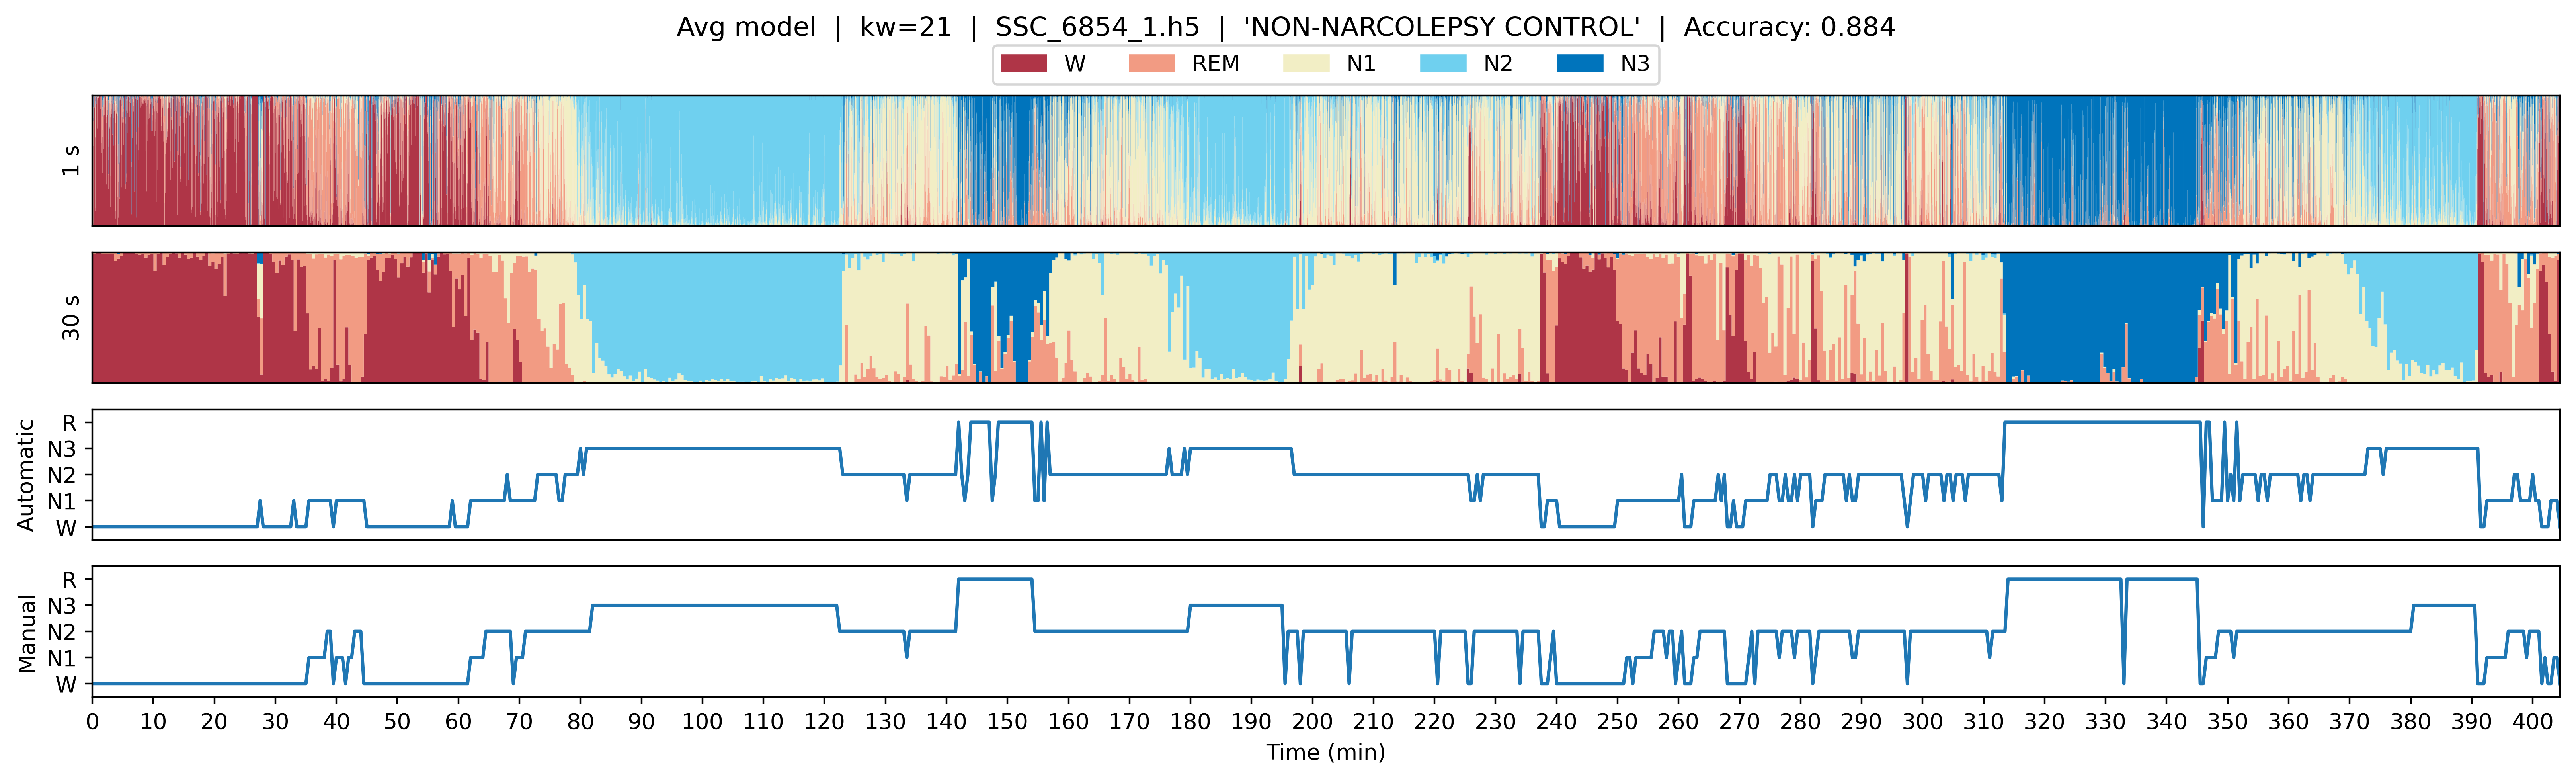

In [26]:
# selected_record = 'SSC_6542_1.h5'
# selected_record = 'SSC_5280_1.h5'
# selected_record = 'SSC_4708_1.h5'
selected_record = 'SSC_6854_1.h5'
record = predictions[selected_record]
plot_hypnodensity(
    record['logits'], 
    record['predicted'], 
    record['true'], 
    title=("Avg model  |  " +
           "kw=21  |  " +
           f"{selected_record}  |  " +
           f"{df_preds.loc[df_preds['FileID'] == selected_record]['Diagnosis'].values[0]}  |  " +
           f"Accuracy: {df_preds.loc[df_preds['FileID'] == selected_record]['Balanced accuracy'].values[0]:.3f}")
)

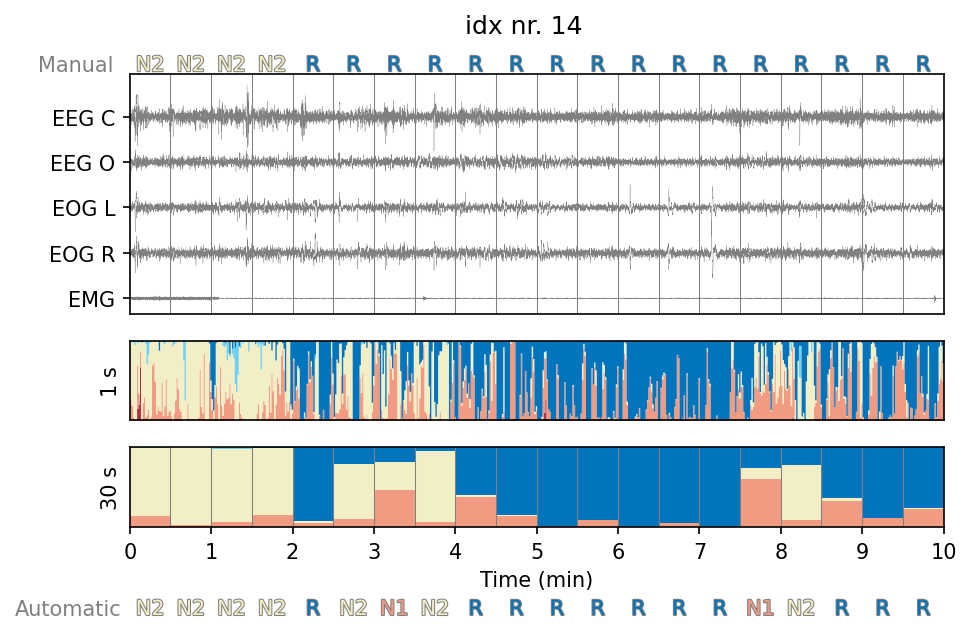

In [27]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=14, 
    interval=10
)

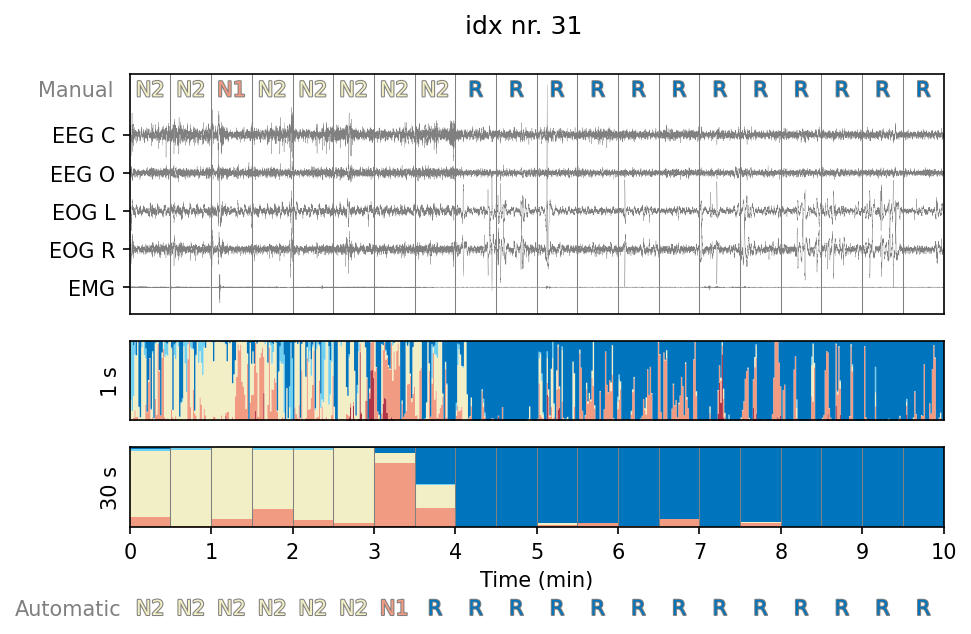

In [28]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=31, 
    interval=10
)

In [ ]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=28, 
    interval=10
)

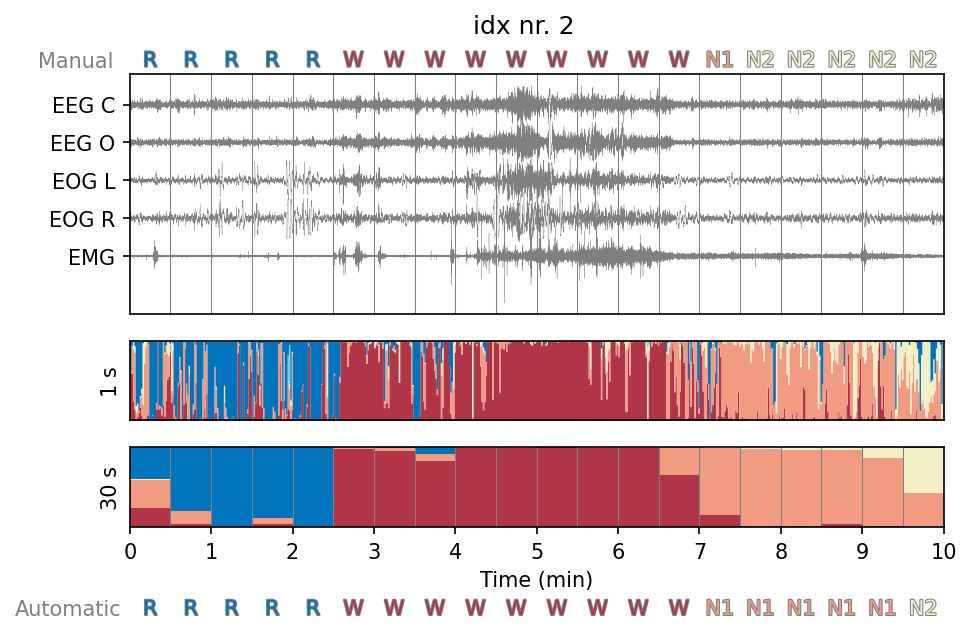

In [12]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=2, 
    interval=10
)

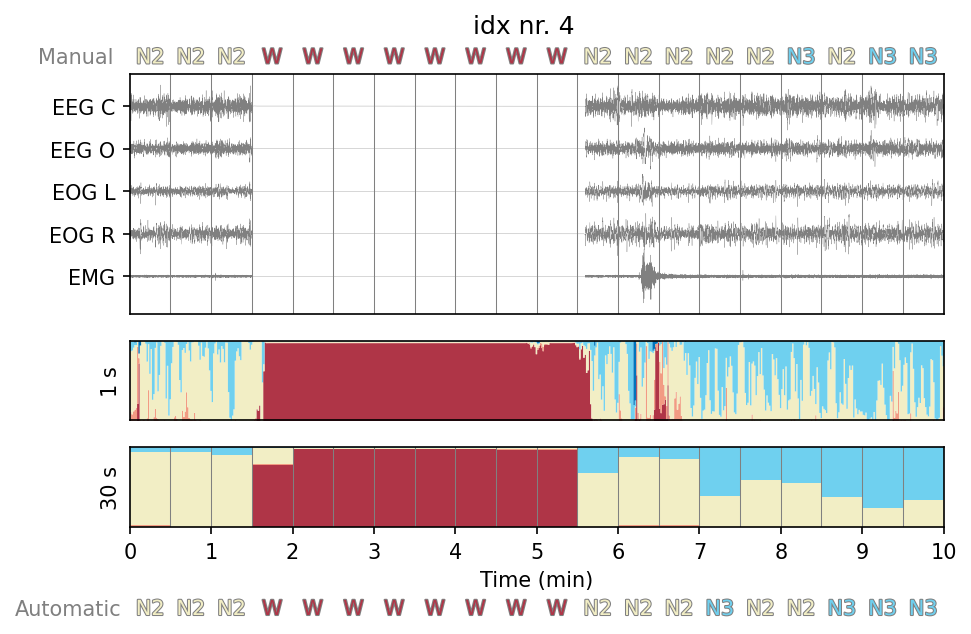

In [8]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=4, 
    interval=10
)

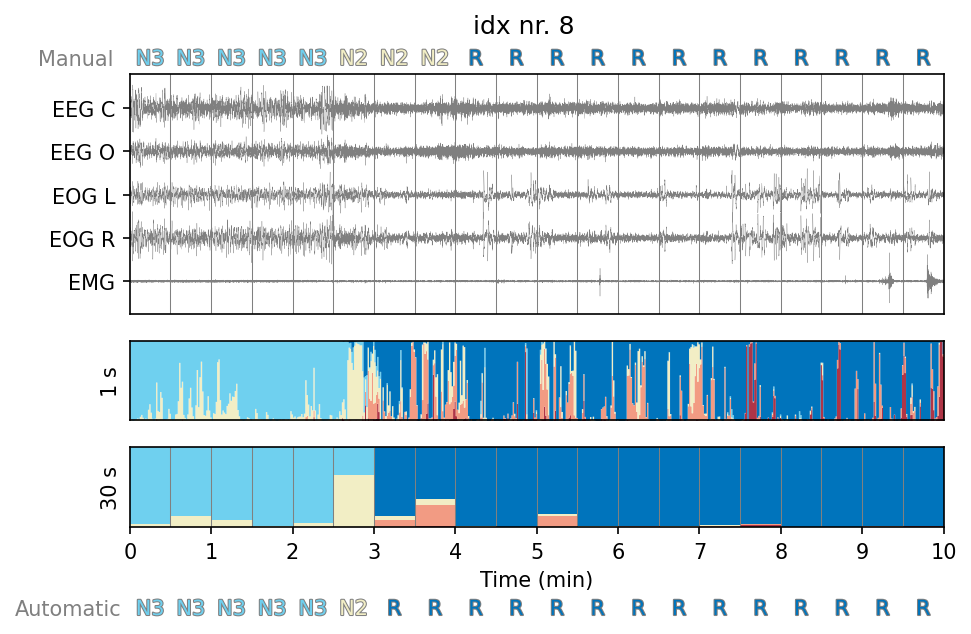

In [9]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=8
)

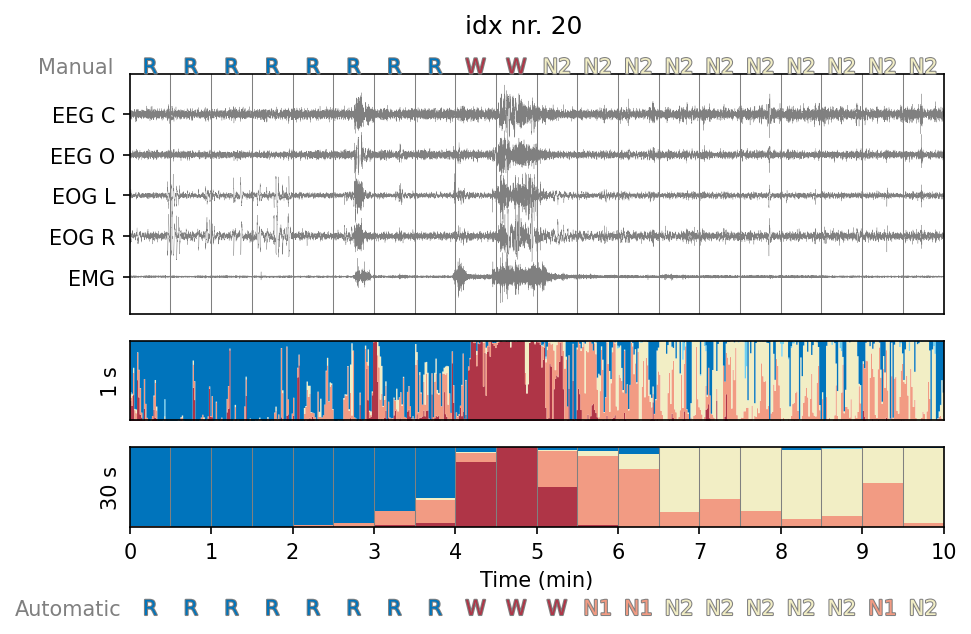

In [10]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=20,
    interval=10
)

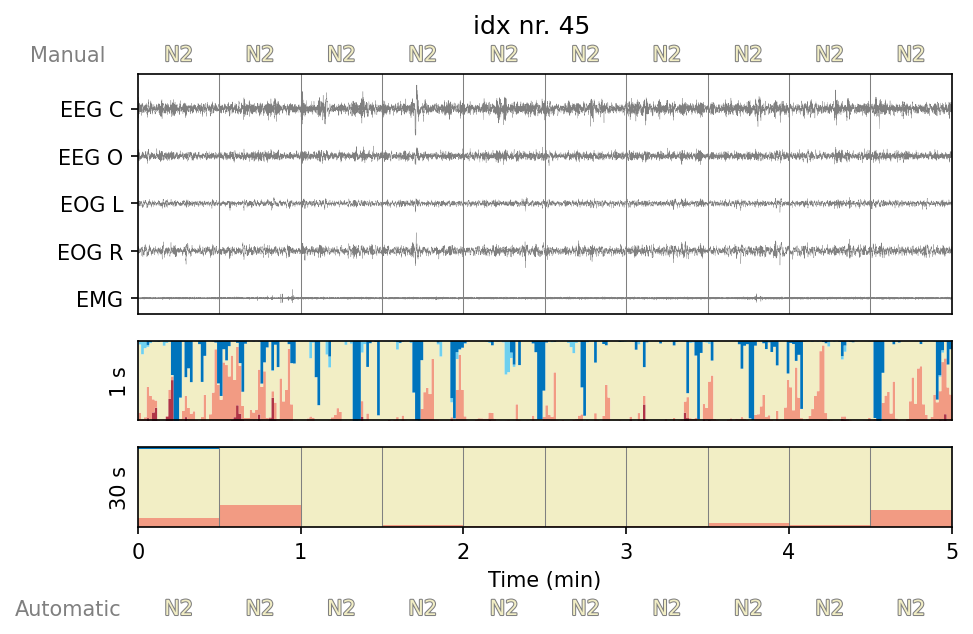

In [11]:
plot_psg_hypnogram_hypnodensity(
    selected_record, 
    record_predictions=record, 
    seq_idx=45,
    interval=5
)